# A. Filters and Convolution (25 points, 5 points for each question)

In [4]:
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import skimage, math
from skimage import io

def convolution(filter,image):
    row = np.size(image,0)
    col = np.size(image,1)
    kernel_c = 3
    kernel_r = 3
    if len(np.shape(image))==2:
            # ================= padding ======================================
            imgPad = np.array([ [0.0]*(col+(math.ceil(kernel_c/2))) for i in range(row+(math.ceil(kernel_r/2)))])
            for i in range(math.ceil(kernel_r/2),row):
                for j in range(math.ceil(kernel_c/2),col):
                    imgPad[i+1][j+1] = image[i][j]
            # ================== filter ======================================
            sum = 0
            imgFiltered = np.array([ [0.0]*(col) for i in range(row)])
            for r in range(math.ceil(kernel_r/2),row+1):
                for c in range(math.ceil(kernel_c/2),col+1):
                    sum = 0
                    # for single element
                    # 2D to 1D: r*n+c
                    for k_r in range(-(math.floor(kernel_r/2)),math.ceil(kernel_r/2)):
                        for k_c in range(-(math.floor(kernel_c/2)),math.ceil(kernel_c/2)):                
                            sum+=filter[k_r*kernel_c+k_c]*imgPad[r+k_r][c+k_c]
                    if sum>255: imgFiltered[r-math.ceil(kernel_r/2)][c-math.ceil(kernel_c/2)] =255
                    elif sum<0: imgFiltered[r-math.ceil(kernel_r/2)][c-math.ceil(kernel_c/2)] = 0
                    else:imgFiltered[r-math.ceil(kernel_r/2)][c-math.ceil(kernel_c/2)] = sum
    elif len(np.shape(image))==3:
            # ================= padding ======================================
            imgPad = np.array([ [[0 for k in range(3)] for j in range(col+(math.ceil(kernel_c/2)))] for i in range(row+(math.ceil(kernel_r/2)))])
            for i in range(math.ceil(kernel_r/2),row):
                for j in range(math.ceil(kernel_c/2),col):
                    for k in range(3):
                        imgPad[i+1][j+1][k] = image[i][j][k]
            # ================== filter ======================================
            sum = 0
            imgFiltered = np.array([ [[0 for k in range(3)] for j in range(col)] for i in range(row)])
            for r in range(math.ceil(kernel_r/2),row+1):
                for c in range(math.ceil(kernel_c/2),col+1):
                    for k in range(3):
                        sum = 0
                        # for single element
                        # 2D to 1D: r*n+c
                        for k_r in range(-(math.floor(kernel_r/2)),math.ceil(kernel_r/2)):
                            for k_c in range(-(math.floor(kernel_c/2)),math.ceil(kernel_c/2)):                
                                sum+=filter[k_r*kernel_c+k_c]*imgPad[r+k_r][c+k_c][k]
                        if sum>255: imgFiltered[r-math.ceil(kernel_r/2)][c-math.ceil(kernel_c/2)][k] =255
                        elif sum<0: imgFiltered[r-math.ceil(kernel_r/2)][c-math.ceil(kernel_c/2)][k] = 0
                        else:imgFiltered[r-math.ceil(kernel_r/2)][c-math.ceil(kernel_c/2)][k] = sum
    return imgFiltered
image = mpimg.imread("Lenna_gray.jpg")
mask1 = np.array([-1,-1,-1,2,2,2,-1,-1,-1]) 
imgFiltered1 = convolution(mask1,image)
cv2.imwrite("Fil1.jpg",imgFiltered1)
img = Image.fromarray(imgFiltered1)
img.show()
mask2 = np.array([-1,-1,2,-1,2,-1,2,-1,-1]) 
imgFiltered2 = convolution(mask2,image)
cv2.imwrite("Fil2.jpg",imgFiltered2)
img = Image.fromarray(imgFiltered2)
img.show()
mask3 = np.array([-1,-1,-1,-1,8,-1,-1,-1,-1]) 
imgFiltered3 = convolution(mask3,image)
cv2.imwrite("Fil3.jpg",imgFiltered3)
img = Image.fromarray(imgFiltered3)
img.show()
mask4 = np.array([-1,0,1,-2,0,2,-1,0,1]) 
imgFiltered4 = convolution(mask4,image)
cv2.imwrite("Fil4.jpg",imgFiltered4)
img = Image.fromarray(imgFiltered4)
img.show()
mask5 = np.array([0,-1,0,1,0,1,0,-1,0]) 
imgFiltered5 = convolution(mask5,image)
cv2.imwrite("Fil5.jpg",imgFiltered5)
img = Image.fromarray(imgFiltered5)
img.show()

# B. Denoising a Picture (15 points)

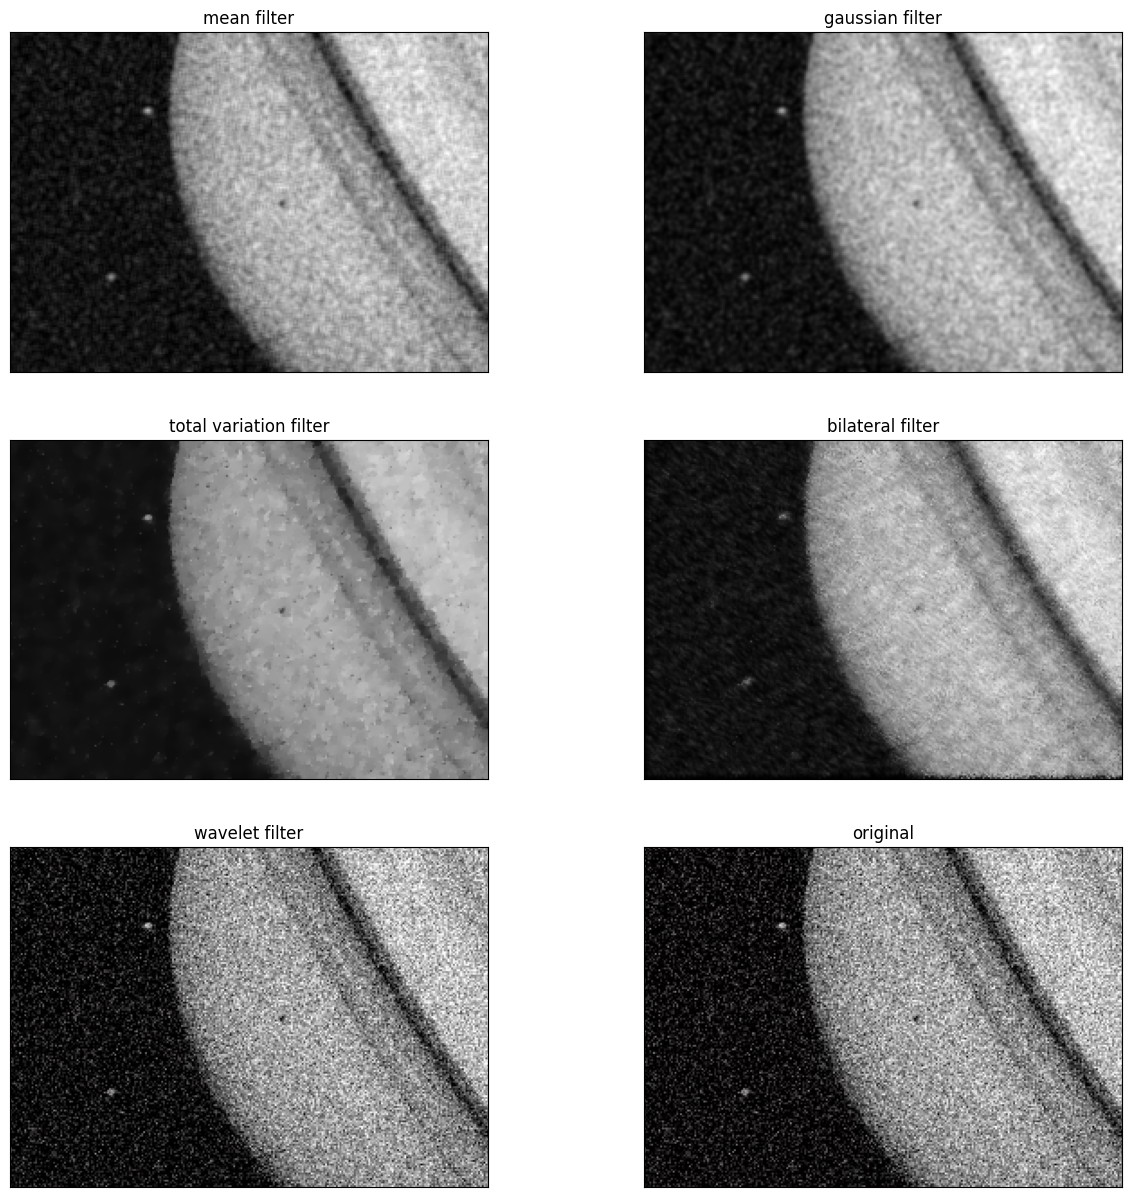

error: OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [2]:
import skimage
import matplotlib.pyplot as plt
from skimage.filters.rank import median, minimum, maximum, mean
from skimage.morphology import square
from scipy.signal import convolve2d
from skimage import filters
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet
import cv2

img = skimage.io.imread('Saturn.jpg')
copy = img.copy()
copy1 = img.copy()
copy2 = img.copy()
copy3 = img.copy()
copy4 = img.copy()
mean = mean(cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY), square(width=3))
gau = filters.gaussian(cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY))
tv = denoise_tv_chambolle(copy2)
bi = denoise_bilateral(cv2.cvtColor(copy3, cv2.COLOR_BGR2GRAY))
wa = denoise_wavelet(copy4)
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
plt.title('mean filter')
plt.imshow(mean, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 2)
plt.title('gaussian filter')
plt.imshow(gau, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 3)
plt.title('total variation filter')
plt.imshow(tv)
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 4)
plt.title('bilateral filter')
plt.imshow(bi, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 5)
plt.title('wavelet filter')
plt.imshow(wa)
plt.xticks([])
plt.yticks([])
plt.subplot(3, 2, 6)
plt.title('original')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

processed = filters.laplace(gau)
sharpen = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) - processed
# sobel_xy = filters.sobel(sharpen)
# processed = mean(processed, square(width=3))
# multilpy = sharpen * processed
# shar = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) + multilpy
# processed = denoise_bilateral(processed)
tv = denoise_tv_chambolle(img)
processed = tv + cv2.cvtColor(sharpen, cv2.COLOR_GRAY2RGB)
# processed = denoise_wavelet(processed)
plt.subplot(1, 2, 1)
plt.title('origin')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('result')
plt.imshow(processed, cmap='gray')
plt.show()

# D. Image Segmentation and Color Space (20 points)

In [3]:
from skimage import io
from skimage.color import rgb2hsv
from matplotlib import pyplot as plt
import cv2
import numpy as np
import matplotlib.image as mpimg
img = io.imread("YellowFan.png")
imgSeg = np.array([ [[0 for k in range(3)] for j in range(np.shape(img)[1])] for i in range(np.shape(img)[0])])
thre = 0.4*255
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        if img[i][j][0]<=255 and img[i][j][0]>=255-thre and img[i][j][1]<=255 and img[i][j][1]>=255-thre and img[i][j][2]>=0 and img[i][j][2]<=80 :
            imgSeg[i][j] = [255, 255, 255]
        else:
            imgSeg[i][j] = [0, 0, 0]

cv2.imwrite("imageSeg.jpg",imgSeg)



True

# E. Document Scanner (20 points)

In [7]:
import skimage
from skimage import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters
from imutils.perspective import four_point_transform
def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 500:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.015 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    # print(biggest," ",max_area)
    return biggest,max_area

def reorder(myPoints):
    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)

    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] =myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] =myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]

    return myPointsNew

# def drawRectangle(img,biggest,thickness):
#     cv2.line(img, (biggest[0][0][0], biggest[0][0][1]), (biggest[1][0][0], biggest[1][0][1]), (0, 255, 0), thickness)
#     cv2.line(img, (biggest[0][0][0], biggest[0][0][1]), (biggest[2][0][0], biggest[2][0][1]), (0, 255, 0), thickness)
#     cv2.line(img, (biggest[3][0][0], biggest[3][0][1]), (biggest[2][0][0], biggest[2][0][1]), (0, 255, 0), thickness)
#     cv2.line(img, (biggest[3][0][0], biggest[3][0][1]), (biggest[1][0][0], biggest[1][0][1]), (0, 255, 0), thickness)

#     return img

def scan_document(img):
    img = img.copy()
    widthImg = img.shape[0]
    heightImg = img.shape[1]

    # TODO_C
    img = cv2.resize(img, (widthImg, heightImg))
    imgBlank = np.zeros((widthImg,heightImg, 3), np.uint8)
    imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1)
    imgThreshold = cv2.Canny(imgBlur, 25, 25)
    kernel = np.ones((3, 3))
    imgDial = cv2.dilate(imgThreshold, kernel, iterations=2)
    imgThreshold = cv2.erode(imgDial, kernel, iterations=1)

    
    imgContours = img.copy()
    # imgBigContour = img.copy()
    contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 2)
    cv2.imwrite("scan_Docu.jpg",imgContours)
    biggest, maxArea = biggestContour(contours)
    if biggest.size != 0:
        biggest=reorder(biggest)
        # cv2.drawContours(imgBigContour, biggest, -1, (0, 255, 0), 20)
        # imgBigContour = drawRectangle(imgBigContour,biggest,2)
        pts1 = np.float32(biggest)
        pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]])
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))
        imgWarpColored = cv2.resize(imgWarpColored,((biggest[3][0][1]-biggest[0][0][1])*2, (biggest[3][0][0]-biggest[2][0][0])*2))
        imgWarpGray = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
        imgAdaptiveThre= cv2.adaptiveThreshold(imgWarpGray, 180, 1, 1, 7, 2)
        imgAdaptiveThre = cv2.dilate(imgAdaptiveThre, kernel)
        imgAdaptiveThre = cv2.bitwise_not(imgAdaptiveThre)
        kernel = np.ones((3, 3), np.uint8)
        imgAdaptiveThre = cv2.morphologyEx(imgAdaptiveThre, cv2.MORPH_OPEN, kernel)
        imgAdaptiveThre = cv2.medianBlur(imgAdaptiveThre, 3)
        imgAdaptiveThre = cv2.GaussianBlur(imgAdaptiveThre, (5, 5), 0)

        return imgWarpColored,imgAdaptiveThre
                  
img = io.imread('invoice.jpg')
img1, img2 = scan_document(img)

cv2.imwrite("Scanned1.jpg", img1)
cv2.imwrite("Scanned2.jpg", img2)

True